In [ ]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functions import *
import seaborn as sns
sns.set(style = 'whitegrid', context = 'talk', palette = 'rainbow')
plt.rcParams['figure.figsize'] = [20, 7]
plt.rcParams['figure.dpi'] = 50
plt.rcParams['axes.titlepad'] = 25 

# Read data

In [ ]:
data = pd.read_excel("Online Retail.xlsx")

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Profile data

In [ ]:
print(data.shape)

(541909, 8)


In [ ]:
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541906 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


#### Missing values

There are now 541909 observations and 8 variables in our Online Retail dataset.

The columns *Description*, *UnitPrice* and *CustomerID* have missing values.

The remaining columns, i.e. *InvoiceNo*, *StockCode*, *Quantity*, *InvoiceDate* and *Country*, have no missing values.

In [ ]:
data.describe(include = 'all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541906.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,23260,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,1114,NaN,NaN,495478
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.552250,NaN,4.611120,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.760121,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN


#### Initial thoughts

We learn from the statistics above that:

1. While the mean value for purchased *Quantity* is 9 and the 75% percentile is 10, the standard deviation for this variable is 219 which is quite odd. 

We also notice there seems to be some odd quantity values such as -80995.000000 and 80995.000000. This is a possible mistake and these two values might be considered as outliers and be excluded from the study.


2. The time period for the dataset is 1 year plus 8 days. It starts from 2010-12-12 08:26 to 2011-12-0912:50. 


3. The mean unit price is ~4.6, while its standard deviation is ~97.3 This means that, like the *Quantity* variable, there might exist some extreme values in the variable Price. We also note the existence if **negative** price values -11062.


4. There are 38 distinct countries in our dataset.


## Preprocess and clean data

In this step:

1. We deleted duplicates 
2. We deleted products with non meaningful prices, i.e. negative prices
3. We deleted poducts with non meaningful StockCode
4. We also excluded the product 23843 because it was purchased (80995 quantity) and returned just after few seconds by the same client. We consider these two datapoints to be outliers.
5. We deleted retailer's gifts (Products with UnitPrice equal to zero)
6. We deleted observations with no CustomerID

In [ ]:
data = clean(data = data) 

C:\Users\House-Info\Desktop\7learnings\functions.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CustomerID'] = data['CustomerID'].astype('str')


# Data Analysis

In this step:

1. We extracted time features: month, hour, day of week
2. We calculated the total price for each observation ( Total price = Quantity * UnitPrice)
3. We added a column 'status' to indicate if a product is purchased or returned

We will try to look at each of the extracted features statistics and create plots to see what we can discover from our dataset.

We will aggregate our data by the time hierarchy to see if there are any periods of time with particular customer behavior.

Next, we will aggregate by product hierarchy to see if there are any products that are more popular among customers, and/or more profitable for retailers.

Next, we will aggregate by location hierarchy, to see where most customers buy from.

Once we have a solid understanding of our dataset from a global point of view, we will pick the most popular and/or profitable products and dissect them from a time series point of view.

In [ ]:
data = add_features(data)

## Time Hierarchy 

In this section, we will try to answer the following questions:

Are there any specific months, days, or hours that drive particular demand?

How is the profit (UnitPrice * Quantity) distributed accross time?

For the time hierarchy analysis to be balanced and make sense, we will only consider data from 2010-12-01 to 2011-12-01.

### Month Analytics

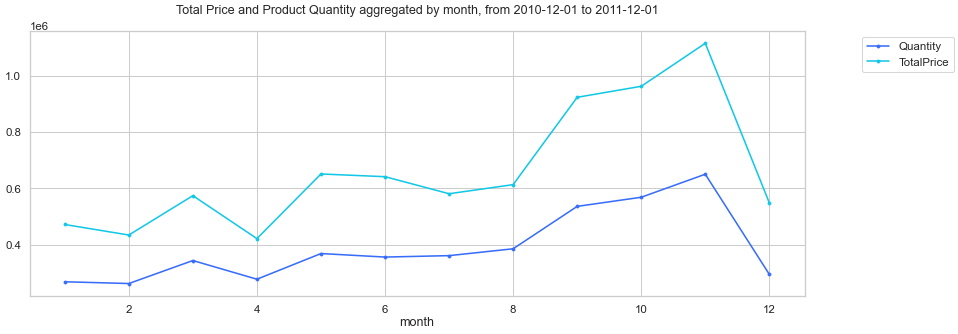

In [ ]:
aggregation_level = "month"
plot_time_series(data, aggregation_level)

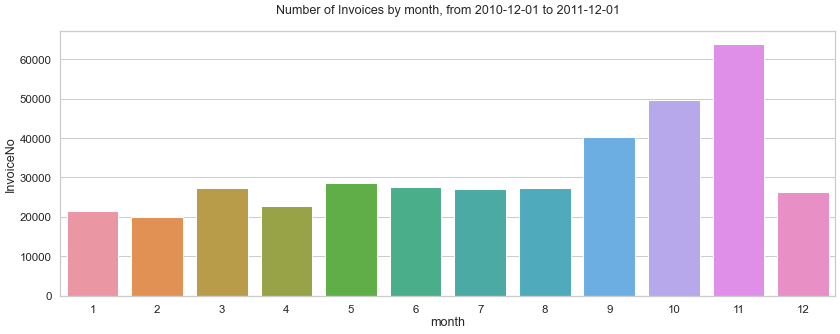

In [ ]:
barplot_invoices(data, aggregation_level)

In [ ]:
aggregation_level_statistics(data, aggregation_level)

,InvoiceNo,Quantity,TotalPrice,InvoiceNo_%,Quantity_%,TotalPrice_%
month,,,,,,
11,63960,649899,1114202.12,16.722705,13.910825,14.043816
10,49722,568190,961742.49,13.000099,12.161877,12.122158
9,40282,535871,922708.74,10.531958,11.470102,11.630162
5,28521,368547,650750.24,7.456977,7.888599,8.202297
6,27459,356088,641129.21,7.179312,7.621920,8.081030
8,27303,385449,612955.13,7.138524,8.250380,7.725913
7,27121,361126,580714.73,7.090940,7.729756,7.319543
3,27372,343765,573838.05,7.156565,7.358151,7.232867
12,26241,294749,548389.27,6.860859,6.308983,6.912101


### Month Analytics Conclusion

The time series plot above shows that there is a correlation between the quantity and the total price spent, which is expected.

We notice that, regarding the total quantity purchased as well as the total profit made, there is an upward trend going from September to November, reaching its peak in November.

November represents respectively 13.91% and 14.04% of the overall quantity and profit (TotalPrice) in 2011.

Similarly, the number of invoices made has a September to November upward trend, with most invoices numbers happening in November (16.72% of total invoices number).

**Customers buy and spend most in the time period from September to November and reach their maximum in November**


### Days of Week Analytics

In [ ]:
# This is the mapping between week days numbers and week days names
data[['day', 'day_num']].drop_duplicates().sort_values('day_num').T

,10144,14022,0,3108,5217,7419
day,Monday,Tuesday,Wednesday,Thursday,Friday,Sunday
day_num,0,1,2,3,4,6


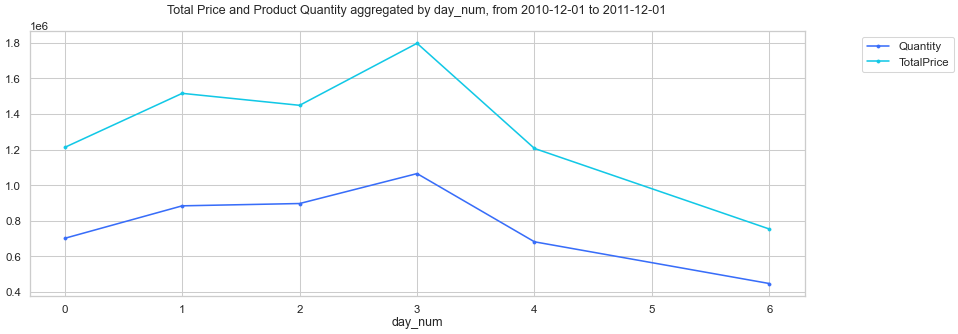

In [ ]:
aggregation_level = "day_num"
plot_time_series(data, aggregation_level)

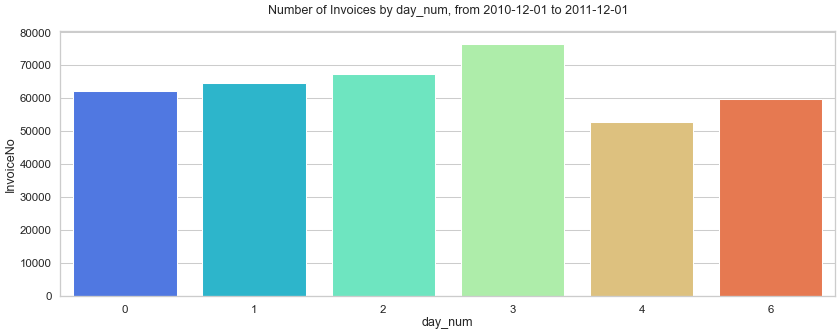

In [ ]:
barplot_invoices(data, aggregation_level)

In [ ]:
aggregation_level_statistics(data, aggregation_level)

,InvoiceNo,Quantity,TotalPrice,InvoiceNo_%,Quantity_%,TotalPrice_%
day_num,,,,,,
3,76412,1064689,1797655.95,19.978351,22.789237,22.658321
1,64483,883278,1516115.03,16.859447,18.906208,19.109675
2,67278,896252,1448795.66,17.590215,19.183911,18.261157
0,62041,700628,1212212.23,16.220972,14.996659,15.279172
4,52603,680888,1206140.45,13.753353,14.574132,15.202641
6,59657,446159,752836.94,15.597662,9.549853,9.489035


### Days of Week Analytics Conclusion

Customers shop/spend most from Monday to Thursday.

Most number of invoices, quantity purchased and total spendings are made in Thursday (respectively 19.97%, 22.78%, 22.65%)

They make less purchases on Friday and Sunday.

Customers seem to not shop at all on Saturdays.

**Customers seem to shop/spend more on weekdays than weekends.**

### Hour of Day Analytics

In [ ]:
print("First hour of purchases : ",min(data.hour))
print("Last hour of purchases : ",max(data.hour))

First hour of purchases :  6
Last hour of purchases :  20


Customers shop from 6h to 20h.

Let's see if there are any peak hours

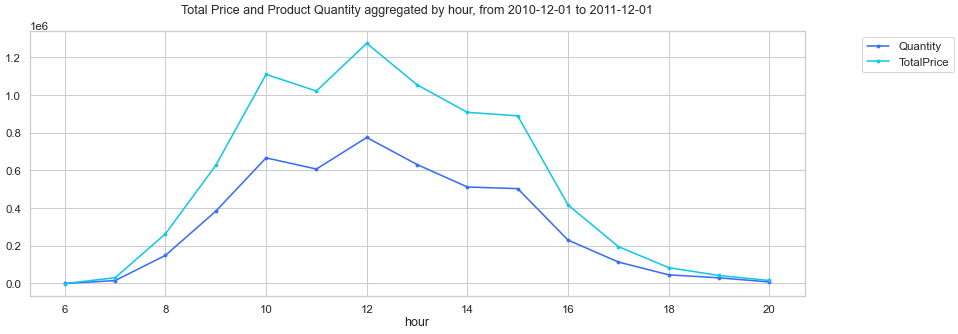

In [ ]:
aggregation_level = "hour"
plot_time_series(data, aggregation_level)

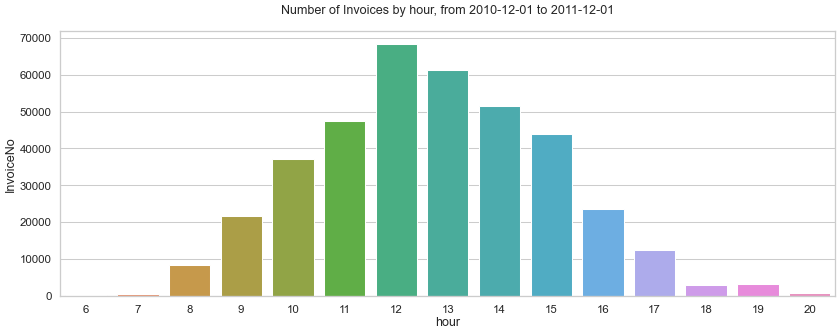

In [ ]:
barplot_invoices(data, aggregation_level)

In [ ]:
aggregation_level_statistics(data, aggregation_level)

,InvoiceNo,Quantity,TotalPrice,InvoiceNo_%,Quantity_%,TotalPrice_%
hour,,,,,,
12,68394,774897,1274746.23,17.882000,16.586357,16.067373
10,37155,666612,1109804.38,9.714386,14.268560,13.988385
13,61200,631453,1054514.95,16.001088,13.515996,13.291497
11,47455,607314,1021361.37,12.407379,12.999310,12.873617
14,51584,512006,908394.65,13.486930,10.959281,11.449742
15,43932,503437,889741.06,11.486271,10.775865,11.214626
9,21607,383410,626689.76,5.649273,8.206736,7.899030
16,23462,230309,416857.48,6.134273,4.929671,5.254226
8,8195,149126,263451.28,2.142629,3.191982,3.320637


### Hour of Day Analytics Conclusion


Most purchased quantity and spendings are made between 10h and 15h.

Customers buy mostly at 12h (17.88%) and secondly at 13h (16%).

Customers start purchasing items from 6h to 20h.

**Peak customer purchases hours are from 12h to 14h (lunch hours). They spend the least in the time periods of 6h-8h, and 18h-20h.**

## Product hierarchy Analytics

In [ ]:
data.sort_values('UnitPrice')
x = data[data.status == "purchased"].groupby(['StockCode','Description']).agg({'InvoiceNo': 'count',
                                                   'Quantity': 'sum',
                                                   'UnitPrice':'mean',
                                                   'TotalPrice': 'sum'})

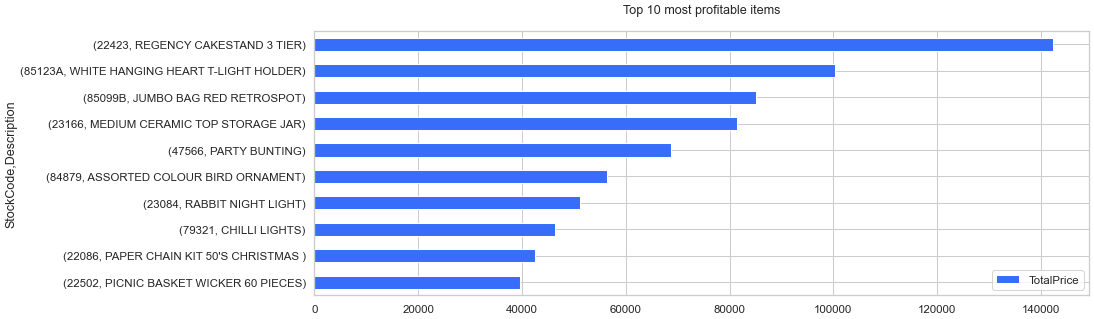

In [ ]:
x[['TotalPrice']].sort_values('TotalPrice', ascending=False).head(10).sort_values('TotalPrice').plot(kind='barh',
                                                                                                 title = 'Top 10 most profitable items');

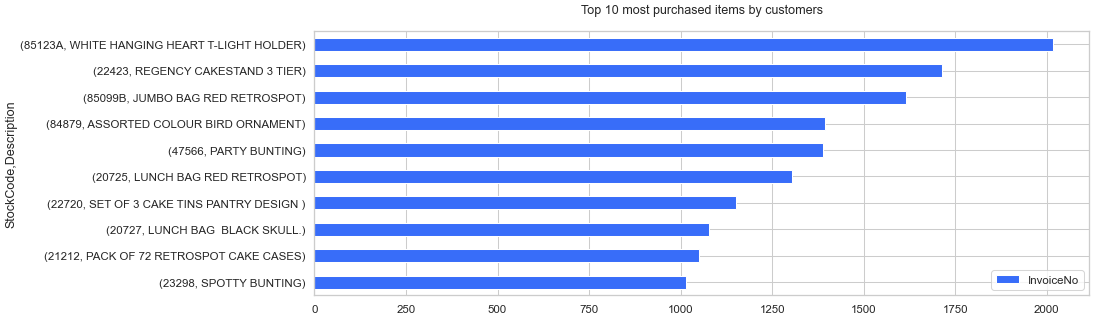

In [ ]:
x[['InvoiceNo']].sort_values('InvoiceNo', ascending=False).head(10).sort_values('InvoiceNo').plot(kind='barh',
                                                                                                 title = 'Top 10 most purchased items by customers');

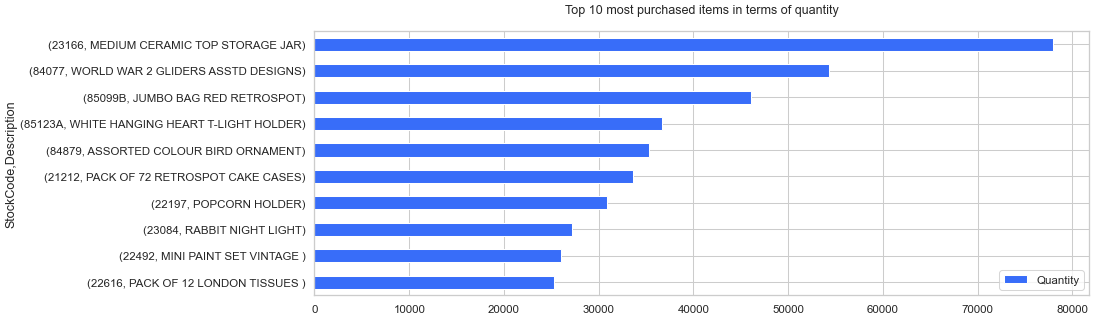

In [ ]:
x[['Quantity']].sort_values('Quantity', ascending=False).head(10).sort_values('Quantity').plot(kind='barh',
                                                                                                 title = 'Top 10 most purchased items in terms of quantity');

In [ ]:
x = add_percentages(x, ['InvoiceNo','Quantity','TotalPrice'])
x.sort_values(['TotalPrice_%', 'InvoiceNo_%', 'Quantity_%'], ascending=False).head(10)

,,InvoiceNo,Quantity,UnitPrice,TotalPrice,InvoiceNo_%,Quantity_%,TotalPrice_%
StockCode,Description,,,,,,,
22423,REGENCY CAKESTAND 3 TIER,1713,12374,12.482896,142264.75,0.437795,0.244502,1.658989
85123A,WHITE HANGING HEART T-LIGHT HOLDER,2016,36706,2.892768,100392.10,0.515233,0.725285,1.170700
85099B,JUMBO BAG RED RETROSPOT,1615,46078,2.015969,85040.54,0.412749,0.910469,0.991681
23166,MEDIUM CERAMIC TOP STORAGE JAR,198,77916,1.220303,81416.73,0.050603,1.539566,0.949423
47566,PARTY BUNTING,1389,15279,4.876220,68785.23,0.354990,0.301902,0.802124
84879,ASSORTED COLOUR BIRD ORNAMENT,1395,35263,1.680710,56413.03,0.356523,0.696772,0.657848
23084,RABBIT NIGHT LIGHT,823,27153,2.012770,51251.24,0.210336,0.536524,0.597655
79321,CHILLI LIGHTS,521,9646,5.428445,46265.11,0.133153,0.190598,0.539510
22086,PAPER CHAIN KIT 50'S CHRISTMAS,1002,15585,2.936986,42566.43,0.256083,0.307949,0.496379


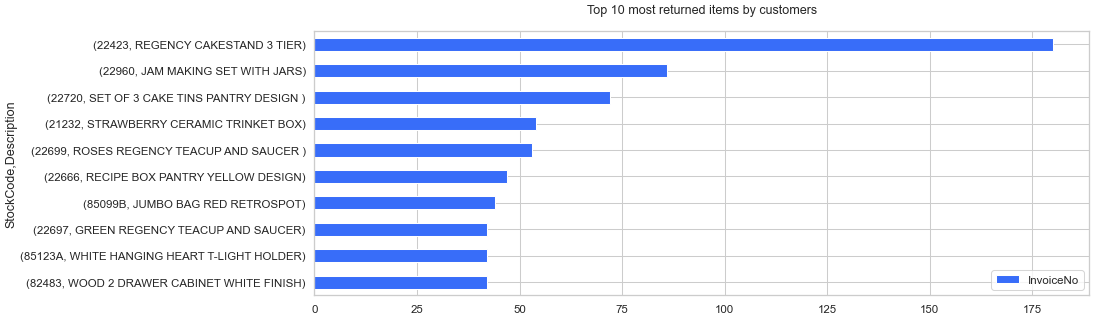

In [ ]:
x = data[data.status == "returned"].groupby(['StockCode','Description']).agg({'InvoiceNo': 'count',
                                                   'Quantity': 'sum',
                                                   'UnitPrice':'mean',
                                                   'TotalPrice': 'sum'})

x[['InvoiceNo']].sort_values('InvoiceNo', ascending=False).head(10).sort_values('InvoiceNo').plot(kind='barh',
                                                                                                 title = 'Top 10 most returned items by customers');

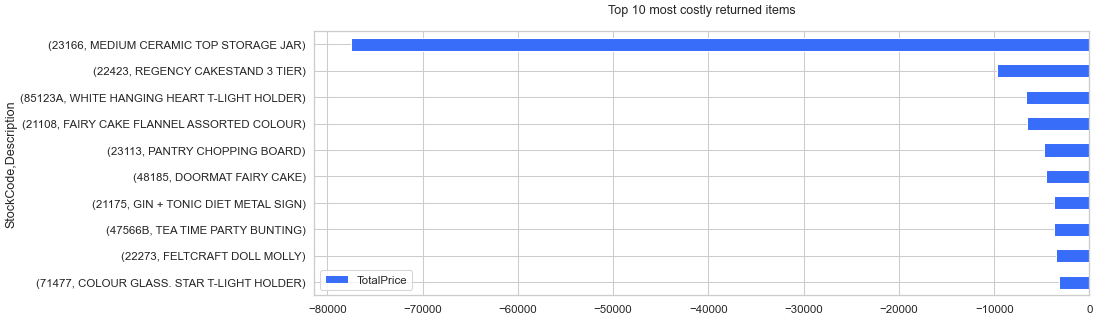

In [ ]:
x[['TotalPrice']].sort_values('TotalPrice').head(10).sort_values('TotalPrice', ascending=False).plot(kind='barh',
                                                                                                     title = 'Top 10 most costly returned items');

## Location Hierarchy Analytics

In [ ]:
x = data.groupby(['Country']).agg({'InvoiceNo': 'count',
                                   'TotalPrice': 'sum'})

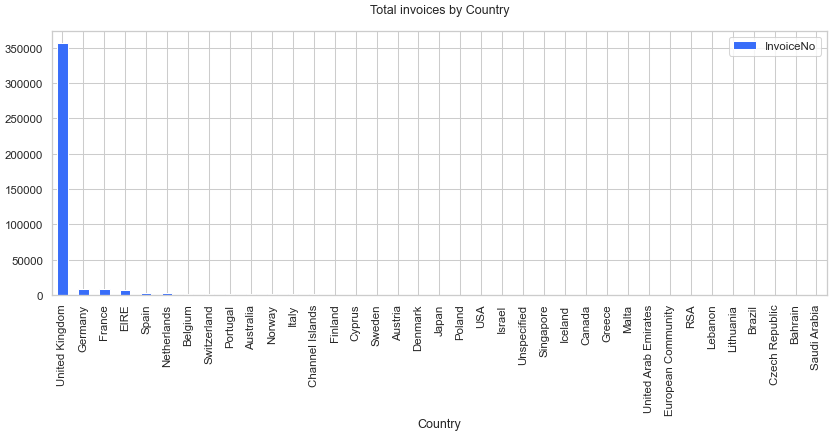

In [ ]:
x[['InvoiceNo']].sort_values('InvoiceNo', ascending=False).plot(kind='bar',
                                                               title = 'Total invoices by Country');

Most invoices are issued from the United Kingdom.

Let's have a closer look at the remaining countries, by looking at the bar plot tail

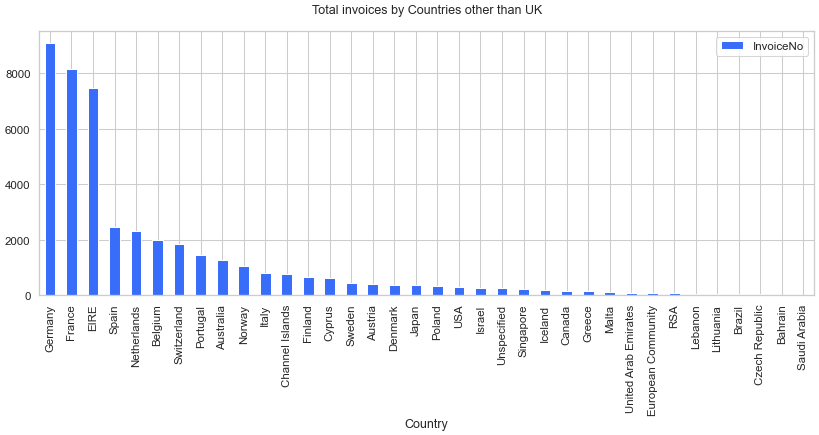

In [ ]:
xx = x.reset_index()
xx = xx[xx.Country != 'United Kingdom']
xx = xx.set_index("Country")
xx[['InvoiceNo']].sort_values('InvoiceNo', ascending=False).plot(kind='bar',
                                                                title = 'Total invoices by Countries other than UK');

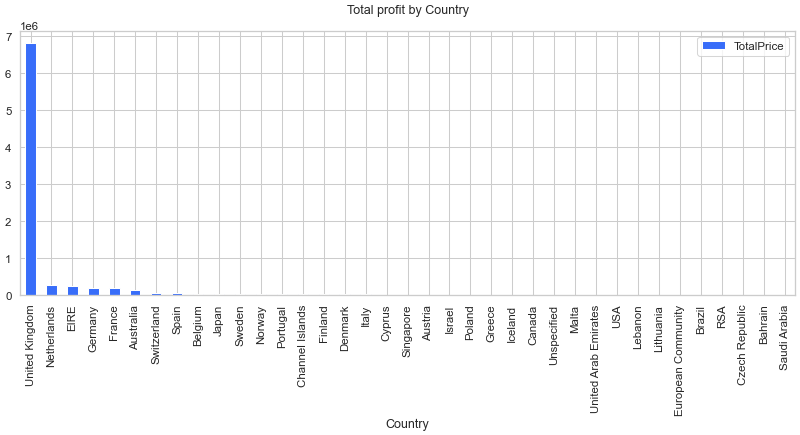

In [ ]:
x[['TotalPrice']].sort_values('TotalPrice', ascending=False).plot(kind='bar',
                                                               title = 'Total profit by Country');

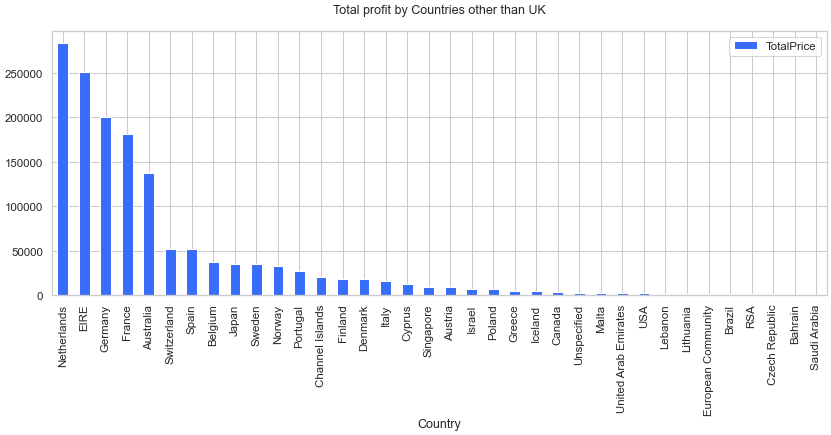

In [ ]:
xx[['TotalPrice']].sort_values('TotalPrice', ascending=False).plot(kind='bar',
                                                                title = 'Total profit by Countries other than UK');

In [ ]:
x = add_percentages(x, ['InvoiceNo','TotalPrice'])
x.sort_values(['TotalPrice_%', 'InvoiceNo_%'], ascending=False).head(10)

,InvoiceNo,TotalPrice,InvoiceNo_%,TotalPrice_%
Country,,,,
United Kingdom,356115,6.803966e+06,89.076629,82.252394
Netherlands,2326,2.834795e+05,0.581813,3.426953
EIRE,7467,2.515575e+05,1.867754,3.041051
Germany,9080,2.006197e+05,2.271221,2.425269
France,8154,1.815715e+05,2.039596,2.194998
Australia,1253,1.369225e+05,0.313418,1.655241
Switzerland,1843,5.185940e+04,0.460998,0.626923
Spain,2462,5.174665e+04,0.615831,0.625560
Belgium,1971,3.666296e+04,0.493015,0.443214


## Location Hierarchy Analytics conclusion

Most curtomers are from the UK (89% number of purchased, 82.25% of the profit)

## Customer Hierarchy

In this section, we will look at the customer hierarchy.

We will try to figure out who are the top customers and which countries they are from.

In [ ]:
x = data[data.status == "purchased"].groupby(['CustomerID','Country']).agg({'Quantity': 'sum',
                                                                  'TotalPrice': 'sum',
                                                                  'InvoiceNo':'count'})
x = add_percentages(x, ['TotalPrice','InvoiceNo', 'Quantity'])
x.sort_values(['TotalPrice_%', 'InvoiceNo_%', 'Quantity_%'], ascending=False).head(5)

,,Quantity,TotalPrice,InvoiceNo,TotalPrice_%,InvoiceNo_%,Quantity_%
CustomerID,Country,,,,,,
14646.0,Netherlands,196844,279138.02,2060,3.255106,0.526479,3.889500
18102.0,United Kingdom,64124,259657.30,431,3.027936,0.110152,1.267045
17450.0,United Kingdom,69973,194390.79,336,2.266845,0.085872,1.382618
14911.0,EIRE,80238,140336.83,5668,1.636507,1.448583,1.585447
12415.0,Australia,77373,124564.53,713,1.452582,0.182223,1.528836


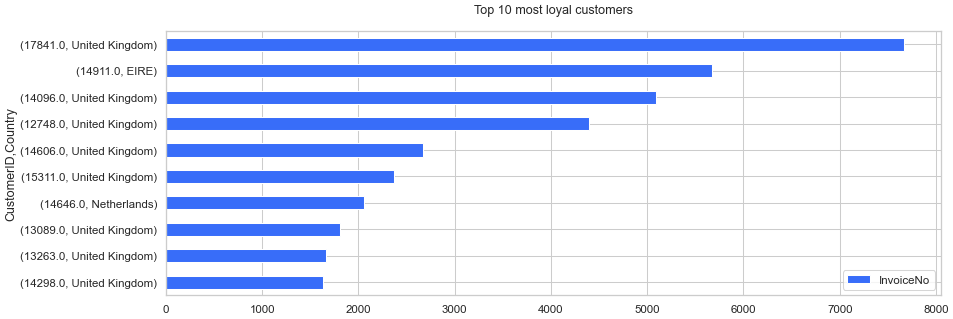

In [ ]:
x[['InvoiceNo']].sort_values('InvoiceNo', ascending=False).head(10).sort_values('InvoiceNo').plot(kind='barh',
                                                                                                 title = 'Top 10 most loyal customers');

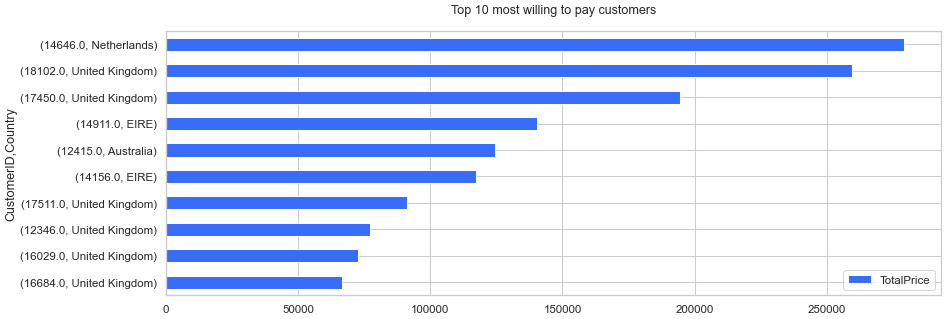

In [ ]:
x[['TotalPrice']].sort_values('TotalPrice', ascending=False).head(10).sort_values('TotalPrice').plot(kind='barh',
                                                                                                 title = 'Top 10 most willing to pay customers');

In [ ]:
x.sort_values(['TotalPrice_%'], ascending=False).head(5)

,,Quantity,TotalPrice,InvoiceNo,TotalPrice_%,InvoiceNo_%,Quantity_%
CustomerID,Country,,,,,,
14646.0,Netherlands,196844,279138.02,2060,3.255106,0.526479,3.889500
18102.0,United Kingdom,64124,259657.30,431,3.027936,0.110152,1.267045
17450.0,United Kingdom,69973,194390.79,336,2.266845,0.085872,1.382618
14911.0,EIRE,80238,140336.83,5668,1.636507,1.448583,1.585447
12415.0,Australia,77373,124564.53,713,1.452582,0.182223,1.528836


Customer **17841** from the Unted Kingdom is the most loyal customer for this retail company. In fact, he purchased 7667 times throughout the year, which represents ~2% of the overall purchases.

Customer **14646** from the Netherlands is the most willing to pay customer. His purchases represent ~3.3% from the overall profit.

### Customer Hierarchy conclusion

Even though, most customers are from the UK, this company needs to invest in a fidelity programs for all of its clients.

In fact, we have seen that the most willing to pay customer is actually from the Netherlands.


## Time series analysis

In this section, we will focus on the quantities sold and their corresponding prices.

We will only consider exactly one year data starting from 2010-12-01 to 2011-12-01.

We only consider purchased products and disregard returned ones.

We will look at one product at a time.

We will select, for this analysis part, items that figure in the top 10 most purchased and profitable products.

For each product, we will look at three plots:
1. One that represents price fluctuations over months.
2. One that represents quantity over months.
3. One that represents quantity over price.

Prices are averaged. Quantites are summed by month.

#### Product 22423

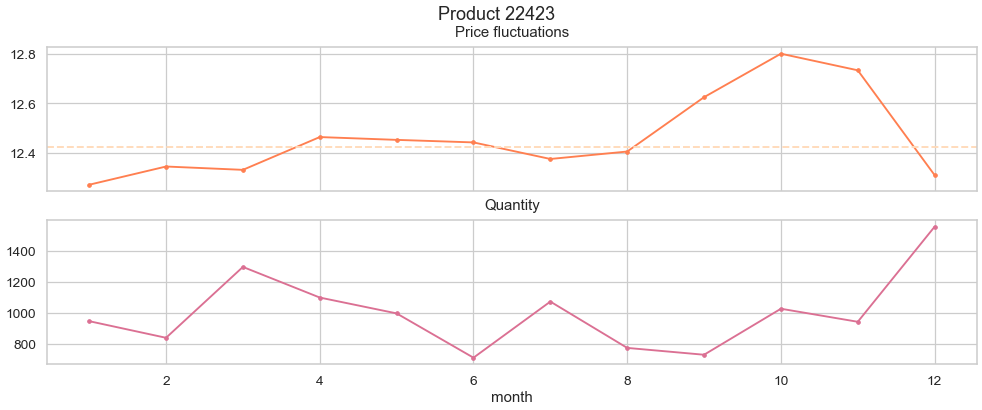

In [ ]:
StockCode = "22423"
quantity_price_plots(data , StockCode)

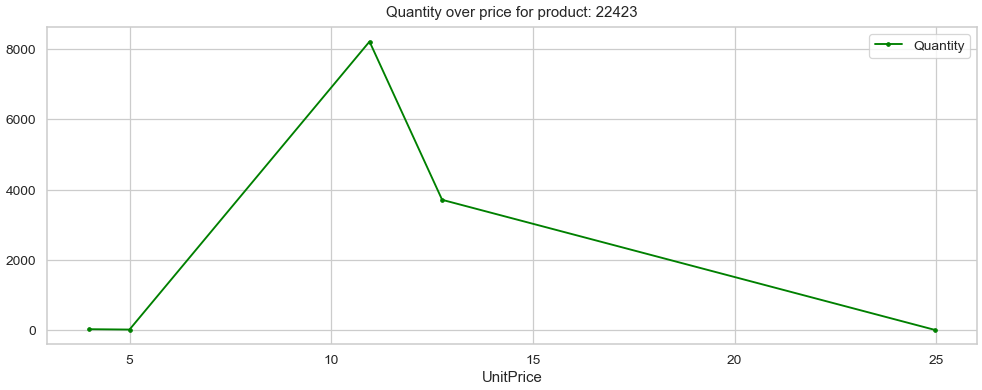

In [ ]:
quantity_over_price_plot(data, StockCode)

#### Product 22423 interpretation

Price has been more or less set constant from January to August.

We note a raise in price by the end of the year going from September to November and then a drop in December.

Customers bought the most in December just after a drop in Price from 12.7 to 12.3.

The relationship between price and sales is split into two categories:
1. Price from 4 to 11:

Inside this price range, customers buy more of this product when its price gets higher. Reasons for this may be: Product is still new and not recognized; customers don't trust products with low prices.

2. Price from 11 to 25

Inside this price range customers buy more when of this product when its price gets lower.

#### Product 85123A

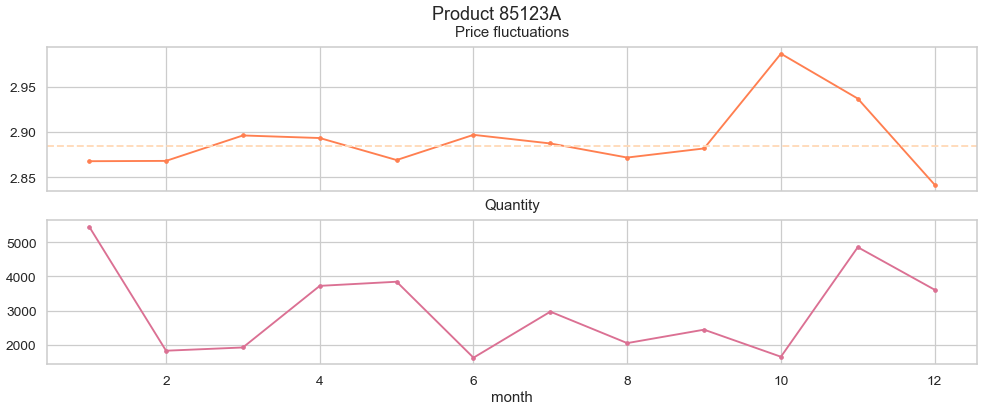

In [ ]:
StockCode = "85123A"
quantity_price_plots(data, StockCode)

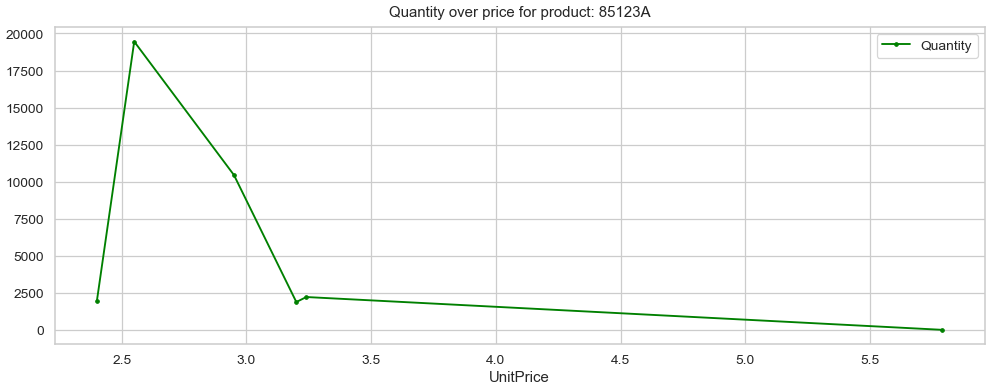

In [ ]:
from functions import *
quantity_over_price_plot(data, StockCode)

Similarly to product 22423, the price for 85123A has been more or less set constant from January to August with a sudden raise in October and a drop from November to December.

The period of time from August to November is quite interesting.

We note a drop in sales after a raise in price in October. This is followed by a drop in price in November and in consequence a raise in sales. Even though the price in November isn't the lowest one throughout the year (it is actually above the mediane value), sales reached a considerable high peak.

In other words, we see that customers buy more after a considerable drop in price, even if the reduced price isn't the lowest throughout the year.

This product is elastic. In fact customers generally buy it more when its price drops.

**It is a good pricing strategy to increase it from its mediane value just before lowering it, as seen in in October to November period.**

#### Product 47566

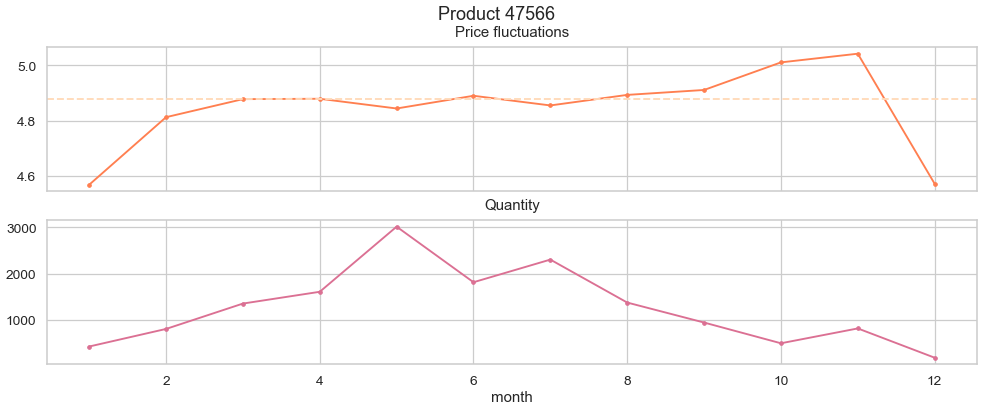

In [ ]:
StockCode = "47566"
quantity_price_plots(data[data.InvoiceDate < "2011-12-01"], StockCode)

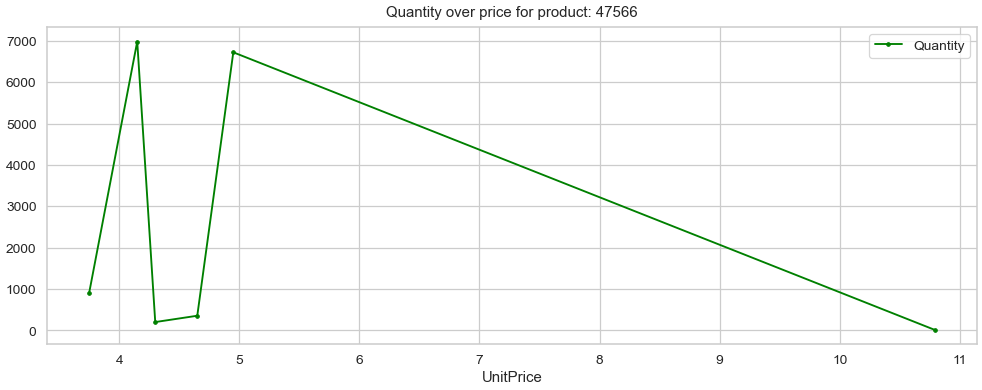

In [ ]:
quantity_over_price_plot(data, StockCode)

#### Product 47566 interpretation

This product elasticity can also be seperated in two periods:

1. Period from January to March:
    Sales rise as the price rises. It is possible that this product is getting introduced and the company is still testing the price. 
    
2. Period from April to December:
    Sales drop as the price rises. We note two peaks in sales in May and July both correlated with price drops.
    
    
The prices for this product have been getting higher from July to November, and consequently, sales have been going lower in that period.

We note a drop in price in December to the itial starting price, but sales still haven't picked up. It is possible that customers develeped loyalty for an alternative product that has a more or less constant price throughout the year.

### Time series analysis conclusions

Customers react differently to price changes from product to product which means that each product has its own price elasticity.


Drops in price need to be seperated by a healthy period of time in order for it to drive more sales. 

The first drop in price after a high price, that has been put for a short period of time, can drive more sales.



We are missing some crutial data points for the price and sales analysis.

In fact, one year of data isn't enough to tell if a raise in price is due to seasonaliy or price change.

We are also missing the marketing/promotion strategy for the product which generally is responsible for raise in sales.

# Study conclusions

Overall, we have concluded the following:
1. Most curtomers are from the UK.
2. Customers buy/spend the most in November.
3. Customers buy/spend the most on Thursday but don't buy at all on Saturday.
4. Customers buy/spend the most at lunch hours.
5. Product 22423 is the most purchased and profitable product.
6. There are some loyal customers. The company might consider investing marketing strategies in order to maintain their loyalty.
7. Customers react differently to price changes from product to product.
8. The first drop in price after a high price, put for a short period of time, can drive more sales.